In [ ]:
pip install keras


import yfinance as yf
import pandas as pd

# 삼성전자 티커 (005930.KS)
ticker = '005930.KS'

# 삼성전자의 최근 1년 치 주가 데이터를 가져옴
samsung = yf.Ticker(ticker)
data = samsung.history(period="1y")

# 결과를 확인하고 Jupyter Notebook에서 바로 출력
data


In [3]:
import yfinance as yf
import pandas as pd

# 삼성전자 티커 (005930.KS)
ticker = '005930.KS'

# 삼성전자의 최근 5년 치 종가 데이터를 가져옴
samsung = yf.Ticker(ticker)
data = samsung.history(period="5y")[['Close']]

# 결과를 확인하고 Jupyter Notebook에서 바로 출력
data.tail(30)


,Close
Date,
2024-10-18 00:00:00+09:00,59200.0
2024-10-21 00:00:00+09:00,59000.0
2024-10-22 00:00:00+09:00,57700.0
2024-10-23 00:00:00+09:00,59100.0
2024-10-24 00:00:00+09:00,56600.0
2024-10-25 00:00:00+09:00,55900.0
2024-10-28 00:00:00+09:00,58100.0
2024-10-29 00:00:00+09:00,59600.0
2024-10-30 00:00:00+09:00,59100.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Feature와 Label 설정
window_size = 30
features = []
labels = []

for i in range(window_size, len(data)):
    features.append(data['Close'].values[i-window_size:i])
    labels.append(data['Close'].values[i])

features = np.array(features)
labels = np.array(labels)

# 학습 데이터와 테스트 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 학습 데이터와 테스트 데이터 크기 출력
print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)


학습 데이터 크기: (960, 30)
테스트 데이터 크기: (240, 30)


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 삼성전자 티커 (005930.KS)
ticker = '005930.KS'

# 삼성전자의 최근 5년 치 종가 데이터를 가져옴
samsung = yf.Ticker(ticker)
data = samsung.history(period="5y")[['Close']]

# Feature와 Label 설정
window_size = 30
features = []
labels = []

for i in range(window_size, len(data)):
    features.append(data['Close'].values[i-window_size:i])
    labels.append(data['Close'].values[i])

features = np.array(features)
labels = np.array(labels)

# 학습 데이터와 테스트 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 학습 데이터와 테스트 데이터 크기 출력
print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

# 모델 학습 - 선형 회귀 모델 사용
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가 - MSE 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)


학습 데이터 크기: (960, 30)
테스트 데이터 크기: (240, 30)
평균 제곱 오차 (MSE): 1335062.3060956525


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 삼성전자 티커 (005930.KS)
ticker = '005930.KS'

# 삼성전자의 최근 5년 치 종가 데이터를 가져옴
samsung = yf.Ticker(ticker)
data = samsung.history(period="5y")[['Close']]

# Feature와 Label 설정
window_size = 30
features = []
labels = []

for i in range(window_size, len(data)):
    features.append(data['Close'].values[i-window_size:i])
    labels.append(data['Close'].values[i])

features = np.array(features)
labels = np.array(labels)

# 학습 데이터와 테스트 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# LSTM 모델을 위한 데이터 형태 변경 (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가 - MSE 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)


c:\Users\highk\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 4274066432.0000
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4259772672.0000
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4248746752.0000
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4218905088.0000
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4359345152.0000
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4235882496.0000
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4386366976.0000
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4332164096.0000
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4240397056.0000
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4261445632.0000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
평균 제곱 오차 (MSE): 4338565947.55943


Epoch 1/10


c:\Users\highk\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4297616384.0000
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4300615168.0000
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4305614848.0000
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4355189760.0000
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4305093632.0000
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4290785792.0000
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4277211904.0000
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4369359360.0000
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4292929792.0000
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4301338112.0000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
평균 제곱 오차 (MSE): 4338473396.03561


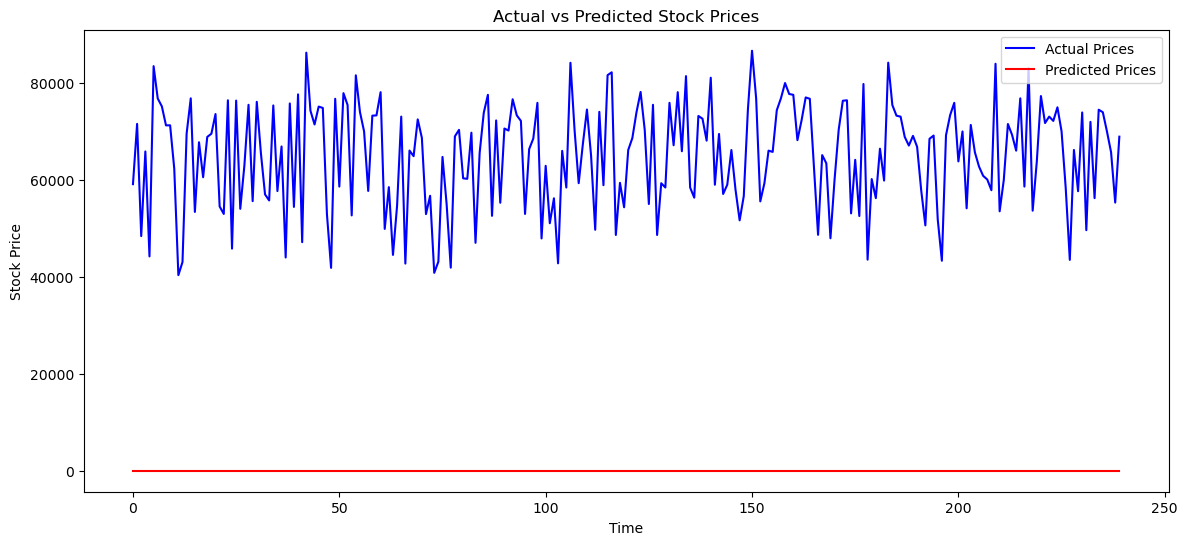

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 삼성전자 티커 (005930.KS)
ticker = '005930.KS'

# 삼성전자의 최근 5년 치 종가 데이터를 가져옴
samsung = yf.Ticker(ticker)
data = samsung.history(period="5y")[['Close']]

# Feature와 Label 설정
window_size = 30
features = []
labels = []

for i in range(window_size, len(data)):
    features.append(data['Close'].values[i-window_size:i])
    labels.append(data['Close'].values[i])

features = np.array(features)
labels = np.array(labels)

# 학습 데이터와 테스트 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# LSTM 모델을 위한 데이터 형태 변경 (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가 - MSE 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)

# 실제값과 예측값 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Prices', color='b')
plt.plot(y_pred, label='Predicted Prices', color='r')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


Epoch 1/50


c:\Users\highk\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0884
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 16/50
30/30

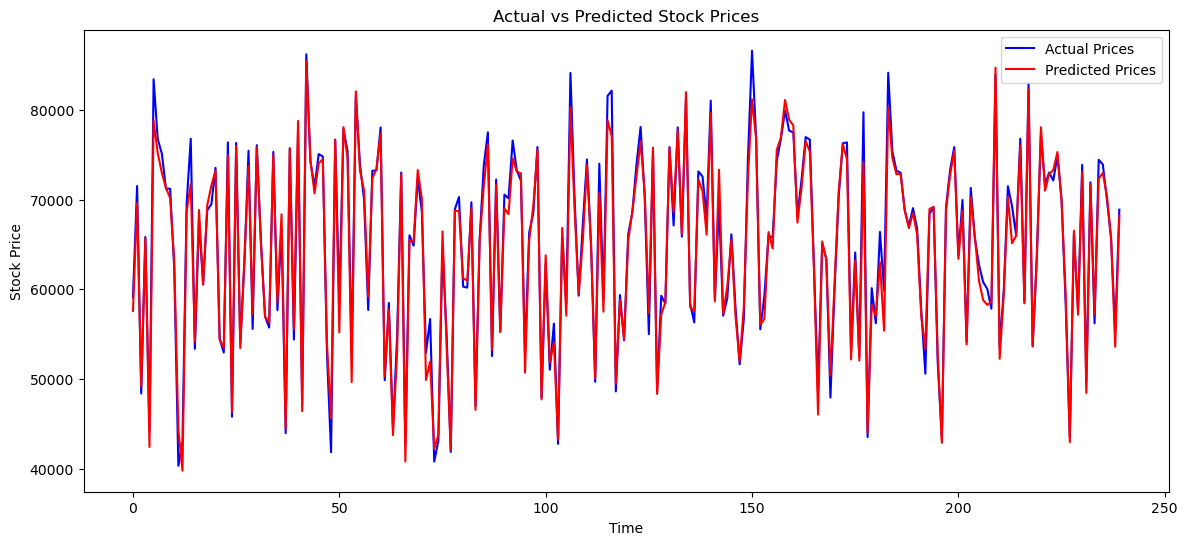

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 삼성전자 티커 (005930.KS)
ticker = '005930.KS'

# 삼성전자의 최근 5년 치 종가 데이터를 가져옴
samsung = yf.Ticker(ticker)
data = samsung.history(period="5y")[['Close']]

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Feature와 Label 설정
window_size = 30
features = []
labels = []

for i in range(window_size, len(data_scaled)):
    features.append(data_scaled[i-window_size:i, 0])
    labels.append(data_scaled[i, 0])

features = np.array(features)
labels = np.array(labels)

# 학습 데이터와 테스트 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# LSTM 모델을 위한 데이터 형태 변경 (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 정규화된 데이터를 원래 스케일로 복원
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_unscaled = scaler.inverse_transform(y_pred)

# 모델 성능 평가 - MSE 출력
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
print("평균 제곱 오차 (MSE):", mse)

# 실제값과 예측값 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test_unscaled, label='Actual Prices', color='b')
plt.plot(y_pred_unscaled, label='Predicted Prices', color='r')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
